# FALCON 9 MACHINE LEARNING PREDICTION

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [35]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [36]:
df= pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [37]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [38]:
X= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1
Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [39]:
Y= df['Class'].to_numpy()

## TASK  2
Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [40]:
transform = preprocessing.StandardScaler()

In [41]:
X= transform.fit_transform(X)

## TASK 3

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [71]:
Y_test.shape

(18,)

## TASK  4

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression()


parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}


logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [73]:
print('Mejores hyperparámetros:', logreg_cv.best_params_)
print('R**2 en media de la cross-validación del mejor estimador:', logreg_cv.best_score_)

Mejores hyperparámetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
R**2 en media de la cross-validación del mejor estimador: 0.8464285714285713


## TASK  5
Calculate the accuracy on the test data using the method <code>score</code>:

In [74]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

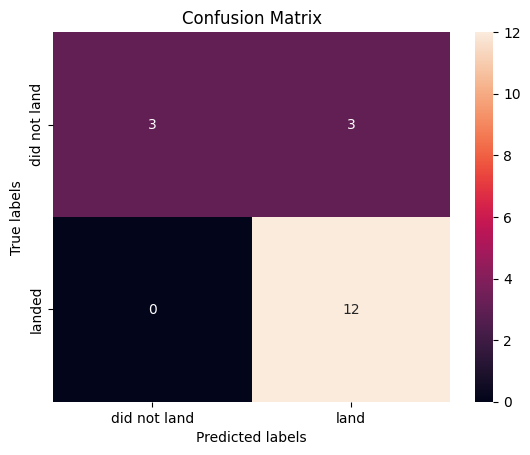

In [75]:
# VAMOS A CREAR UNA MATRIZ DE CONFUSIÓN

yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)     # DEFINIDA AL PRINCIPIO

## TASK  6

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [76]:
from sklearn.svm import SVC

svm = SVC()

parameters = {'kernel':('linear','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [77]:
print("Mejores parámetros",svm_cv.best_params_)
print("Precisión :",svm_cv.best_score_)

Mejores parámetros {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Precisión : 0.8482142857142856


## TASK  7

Calculate the accuracy on the test data using the method <code>score</code>:

In [78]:
svm_cv.score(X_test,Y_test)

0.8333333333333334

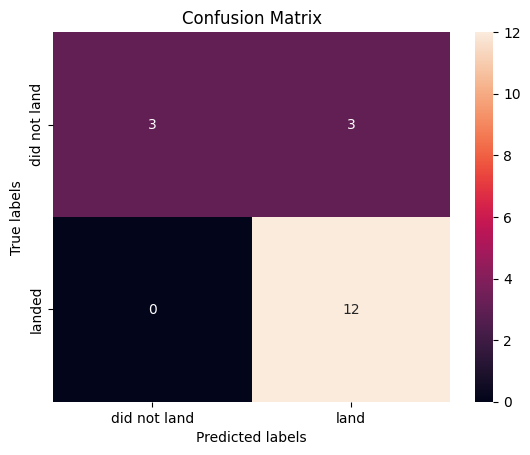

In [79]:
# MATRIZ DE CONFUSIÓN SVM
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [88]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree_cv = GridSearchCV(estimator= tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("Mejores hyperparámetros ",tree_cv.best_params_)
print("Precisión :",tree_cv.best_score_)

Mejores hyperparámetros  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Precisión : 0.8875000000000002


c:\Users\ppabl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ppabl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ppabl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\ppabl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\b

## TASK  9

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [89]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

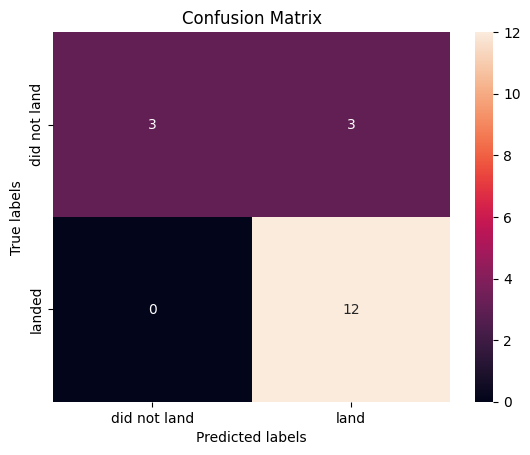

In [90]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn_cv = GridSearchCV(estimator= knn, param_grid= parameters, cv=10)

knn_cv.fit(X_train, Y_train)

print("Mejóres parámetros",knn_cv.best_params_)
print("Precisisón :",knn_cv.best_score_)

Mejóres parámetros {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Precisisón : 0.8482142857142858


## TASK  11

Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

In [92]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

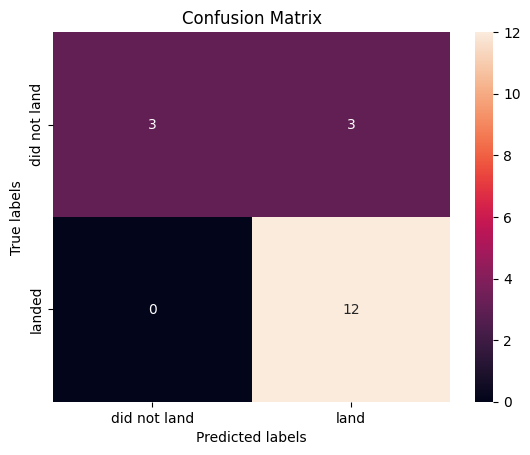

In [93]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12

Find the method performs best:

Logistic Regression score: 0.8333333333333334
SVM score: 0.8333333333333334
Decision Tree score: 0.8333333333333334
KNN score: 0.8333333333333334


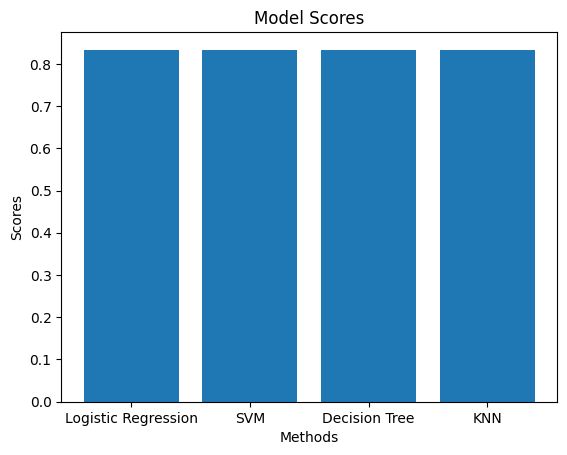

In [94]:
Scores = []
Methods = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']

Models = [logreg_cv, svm_cv, tree_cv, knn_cv]

for model, method in zip(Models, Methods):
    score = model.score(X_test, Y_test)
    Scores.append(score)
    print(f"{method} score: {score}")

plt.bar(Methods, Scores)
plt.xlabel('Methods')
plt.ylabel('Scores')
plt.title('Model Scores')
plt.show()

In [ ]:
# THEY ALL PERFOM THE SAME